# pre-compute coordinates for Coordinate Embedding

* For Convolutional layers on CoordConv
* For input


The coordinates that are computed hsould be:
- Absolute
- Relative

pre-compute coorinates in:

Sin|Cos transforms for different periods

Different radious signals for linear vectors

In [1]:
#

import numpy as np
import torch

import matplotlib.pyplot as plt

%matplotlib inline



In [66]:
FibArray

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [75]:
FibArray = [0,1] 

def fib(n): 
    if n<0: 
        print("Incorrect input") 
    elif n<=len(FibArray): 
        return FibArray[n-1] 
    else: 
        temp_fib = fib(n-1)+fib(n-2) 
        FibArray.append(temp_fib) 
        return temp_fib 

    
def get_coord_emb(shape=(1024,11), fibinit = 6):
    """
    
    Computes #channels coordinates for a vector of the given length.
    The coordinates are computed as follow:
    
    @param shape: shape (lenght,channels) of the embedding vector
    @param fibinit: if 0 uses linear, if >0 uses fibonacci series
    @return: a vector of shape of the input value 
    
    """
    # get steps, I decided to use it with Fibonacci numbers so the signals can mix and give longer relations
    
    assert(len(shape)==2 and shape[0]>100 and shape[1]>0)
    if fibinit > 0:
        fib(shape[1])
        steps = FibArray[fibinit:shape[1]+fibinit]
    else:
        steps = [shape[0]//(i+1) for i in range(shape[1])]
    PI2 = 2*np.pi
    
    ret = []
    for stp in steps:
        arr = np.arange(0, PI2, PI2/float(stp))
        oarr = np.tile(arr, int(np.ceil(float(shape[0])/stp)))
        ret.append(oarr[:shape[0]])
    
    sret = np.sin(ret)
    return sret


In [71]:
rets = get_coord_emb(shape=(1024,11))

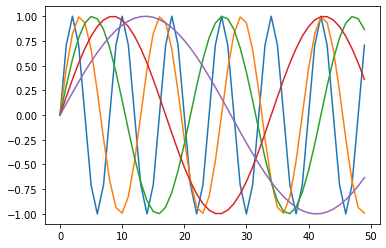

In [72]:
plt.plot(np.transpose(rets[:,:50]))
plt.show()

In [76]:
rets2 = get_coord_emb(shape=(1024,11), fibinit=0)

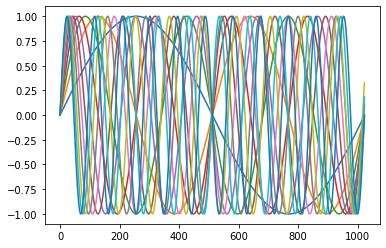

In [78]:
plt.plot(np.transpose(rets2))
plt.show()